##Feature Selections, Feature Manipulations, Learning and Predictions##

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [7]:
dataa = pd.read_csv('Bio_DataNew.csv')

In [8]:
dataa.dtypes

amount                 float64
interest               float64
tenure                   int64
debit_interest         float64
feeees                 float64
repaymentAmount        float64
totalPaid              float64
outstanding_balance    float64
balance_available      float64
repaymentStatus          int64
Year                     int64
Month                    int64
Day                      int64
States                   int64
LGA                      int64
Regions                  int64
Gender                   int64
Channel                  int64
Partners                 int64
Kyc_Types                int64
dtype: object

In [9]:
dataa.describe()



,amount,interest,tenure,debit_interest,feeees,repaymentAmount,totalPaid,outstanding_balance,balance_available,repaymentStatus,Year,Month,Day,States,LGA,Regions,Gender,Channel,Partners,Kyc_Types
count,624479.000000,624479.000000,624479.000000,624479.000000,624479.000000,624479.000000,6.244790e+05,624479.000000,6.244790e+05,624479.000000,624479.000000,624479.000000,624479.000000,624479.000000,624479.000000,624479.000000,624479.000000,624479.000000,624479.000000,624479.000000
mean,34787.186126,4.473441,1.583861,26.405409,1667.520315,36454.706441,3.554463e+04,883.851214,2.059759e+04,0.977567,2022.234443,6.399496,15.929620,22.054670,311.860429,4.983279,0.554286,1.783158,1.996664,2.187355
std,40200.918267,1.555468,1.364530,232.294023,2228.043066,42307.042973,4.185916e+04,9395.929932,6.184969e+04,0.148087,0.598131,3.696550,8.675287,8.644476,211.502758,2.331966,0.497045,0.633428,0.075568,0.414803
min,150.000000,2.500000,0.000000,0.000000,0.000000,153.750000,0.000000e+00,-1180.710000,0.000000e+00,0.000000,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10000.000000,2.500000,0.000000,0.000000,360.000000,10250.000000,9.540000e+03,0.000000,0.000000e+00,1.000000,2022.000000,3.000000,8.000000,18.000000,126.000000,4.000000,0.000000,2.000000,2.000000,2.000000
50%,22000.000000,5.000000,2.000000,0.000000,938.000000,22990.000000,2.173000e+04,0.000000,9.007000e+01,1.000000,2022.000000,6.000000,16.000000,25.000000,290.000000,6.000000,1.000000,2.000000,2.000000,2.000000
75%,50000.000000,6.000000,3.000000,0.000000,2220.000000,52172.500000,5.145000e+04,0.000000,1.361717e+04,1.000000,2023.000000,10.000000,23.000000,28.000000,492.000000,7.000000,1.000000,2.000000,2.000000,2.000000
max,701700.000000,7.500000,4.000000,15082.050000,30000.000000,719242.500000,1.004313e+06,437988.620000,9.477751e+06,1.000000,2023.000000,12.000000,31.000000,37.000000,704.000000,8.000000,1.000000,4.000000,2.000000,4.000000


Text(0, 0.5, 'Total_Disbursed')

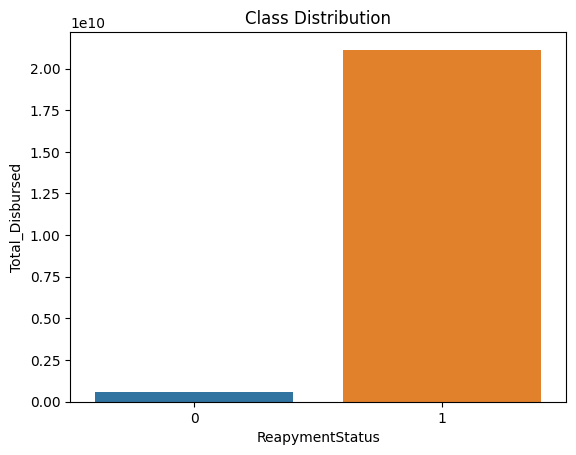

In [10]:
Groupby_Data = dataa.groupby('repaymentStatus')['amount'].sum().reset_index()

sns.barplot(x = 'repaymentStatus', y = 'amount', data = Groupby_Data)
plt.title('Class Distribution')
plt.xlabel('ReapymentStatus')
plt.ylabel('Total_Disbursed')

In [11]:
Completed_Loans = dataa[dataa['repaymentStatus']==1]
Completed_Loans['repaymentStatus'].count()

610470

In [12]:
Active_Loans = dataa[dataa['repaymentStatus']==0]
Active_Loans['repaymentStatus'].count()

14009

In [13]:
Class = dataa['repaymentStatus']
Class

0         1
1         1
2         1
3         1
4         1
         ..
624474    1
624475    1
624476    1
624477    1
624478    1
Name: repaymentStatus, Length: 624479, dtype: int64

In [14]:
Features = dataa.drop('repaymentStatus', axis = 1)
Features.tail(3)

,amount,interest,tenure,debit_interest,feeees,repaymentAmount,totalPaid,outstanding_balance,balance_available,Year,Month,Day,States,LGA,Regions,Gender,Channel,Partners,Kyc_Types
624476,56000.0,2.5,0,0.0,1400.0,57400.0,57400.0,0.0,20.00,2023,4,29,19,133,8,1,2,2,2
624477,3000.0,2.5,0,0.0,75.0,3075.0,3075.0,0.0,137.74,2023,4,29,25,280,6,0,2,2,2
624478,65000.0,2.5,0,0.0,1625.0,66625.0,66625.0,0.0,0.00,2023,4,29,28,290,7,1,2,2,3


##**Feauture Selections- F_Regressions Technics**##

In [15]:
from sklearn.feature_selection import SelectKBest, f_regression, chi2


# Apply the KBest feature selection
k = 3  # Number of best features to select
kbest = SelectKBest(score_func=f_regression, k=k)
selected_features = kbest.fit_transform(Features, Class)

# Get the indices of the selected features
selected_indices = kbest.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = Features.columns[selected_indices]

# Print the selected feature names
print("Selected Features:")
for feature in selected_feature_names:
    print(feature)

Selected Features:
debit_interest
totalPaid
outstanding_balance


##**Feature Selection With Chi2 Technic**##

In [16]:
from sklearn.preprocessing import MinMaxScaler



# Apply the MinMaxScaler to scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(Features)

# Apply the KBest feature selection
k = 3  # Number of best features to select
kbest = SelectKBest(score_func=chi2, k=k)
selected_features = kbest.fit_transform(X_scaled, Class)

# Get the indices of the selected features
selected_indices = kbest.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = Features.columns[selected_indices]

# Print the selected feature names
print("Selected Features:")
for feature in selected_feature_names:
    print(feature)

Selected Features:
tenure
debit_interest
outstanding_balance


##**Feature Selection with Xtra Tree Classifier**##

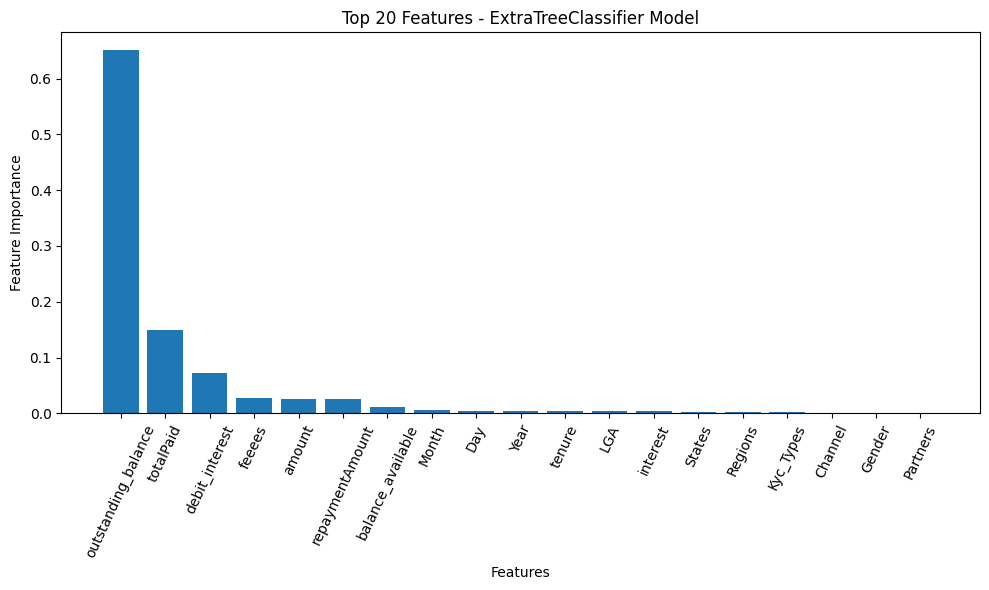

In [17]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

# Feature selection with ExtraTreeClassifier
model = ExtraTreesClassifier()
model.fit(Features, Class)

# Get feature importances
importances = model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Select the top 10 features
k = 20  # Number of best features to select
selected_indices = indices[:k]
selected_features = Features.columns[selected_indices]
selected_importances = importances[selected_indices]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(selected_features, selected_importances)
plt.xticks(rotation=65)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Top 20 Features - ExtraTreeClassifier Model")
plt.tight_layout()
plt.show()

##Comments##

The above Tree Classifier above shows the feature according to their importance in bar chart. The tallest bar shows how the features  are important when looking at the target variable Class.

##**Heatmap or Correlation Technic**##

This is useful to show the variable with high correlation with the target variable, the repaymentStatus. It looks like almost all the technic of feature engineering technic agrees with one another except in few cases.

In [18]:
Correlations = dataa.corr()
Correlations

,amount,interest,tenure,debit_interest,feeees,repaymentAmount,totalPaid,outstanding_balance,balance_available,repaymentStatus,Year,Month,Day,States,LGA,Regions,Gender,Channel,Partners,Kyc_Types
amount,1.000000,0.178089,0.190711,0.183925,0.942330,0.999845,0.974289,0.162964,0.076973,-0.029230,-0.048370,0.009902,-0.001722,-0.034564,0.031692,-0.045302,0.058175,0.043156,-0.014346,-0.021934
interest,0.178089,1.000000,0.910201,0.038495,0.377240,0.189091,0.180159,0.045742,0.018700,-0.062964,0.008813,0.034180,-0.017108,0.022381,0.005919,-0.009563,0.011468,0.045530,0.006337,-0.043101
tenure,0.190711,0.910201,1.000000,0.021750,0.356865,0.200011,0.190029,0.048478,0.049604,-0.068047,0.223639,0.012557,-0.017608,0.022434,0.007247,-0.011287,-0.018737,0.142787,0.011386,-0.183418
debit_interest,0.183925,0.038495,0.021750,1.000000,0.187743,0.184656,0.072291,0.526036,-0.023532,-0.307777,-0.041400,-0.030595,-0.006996,-0.009274,0.003144,-0.010350,0.026854,-0.016945,-0.007898,0.036873
feeees,0.942330,0.377240,0.356865,0.187743,1.000000,0.948083,0.921840,0.163251,0.073984,-0.038597,-0.051838,0.019257,-0.003455,-0.027374,0.028474,-0.040824,0.057072,0.042344,-0.016157,-0.023493
repaymentAmount,0.999845,0.189091,0.200011,0.184656,0.948083,1.000000,0.974334,0.163449,0.077037,-0.029808,-0.048692,0.010423,-0.001818,-0.034285,0.031614,-0.045197,0.058285,0.043238,-0.014482,-0.022079
totalPaid,0.974289,0.180159,0.190029,0.072291,0.921840,0.974334,1.000000,-0.052910,0.084058,0.103078,-0.053494,0.012833,-0.002901,-0.032286,0.031090,-0.042538,0.055444,0.041356,-0.014638,-0.020189
outstanding_balance,0.162964,0.045742,0.048478,0.526036,0.163251,0.163449,-0.052910,1.000000,-0.029706,-0.602131,0.007592,-0.004213,-0.000157,-0.011400,0.004302,-0.013809,0.016285,0.007229,-0.000253,-0.004790
balance_available,0.076973,0.018700,0.049604,-0.023532,0.073984,0.077037,0.084058,-0.029706,1.000000,0.050419,0.088386,-0.005618,0.001840,-0.025591,0.015921,-0.020524,-0.007959,0.053533,0.001595,-0.073516
repaymentStatus,-0.029230,-0.062964,-0.068047,-0.307777,-0.038597,-0.029808,0.103078,-0.602131,0.050419,1.000000,-0.030312,0.012501,0.000696,0.011168,-0.003999,0.016191,-0.022169,-0.007439,0.001041,0.006326


##Visualisation of the Correlation Technics of Feature Selections##

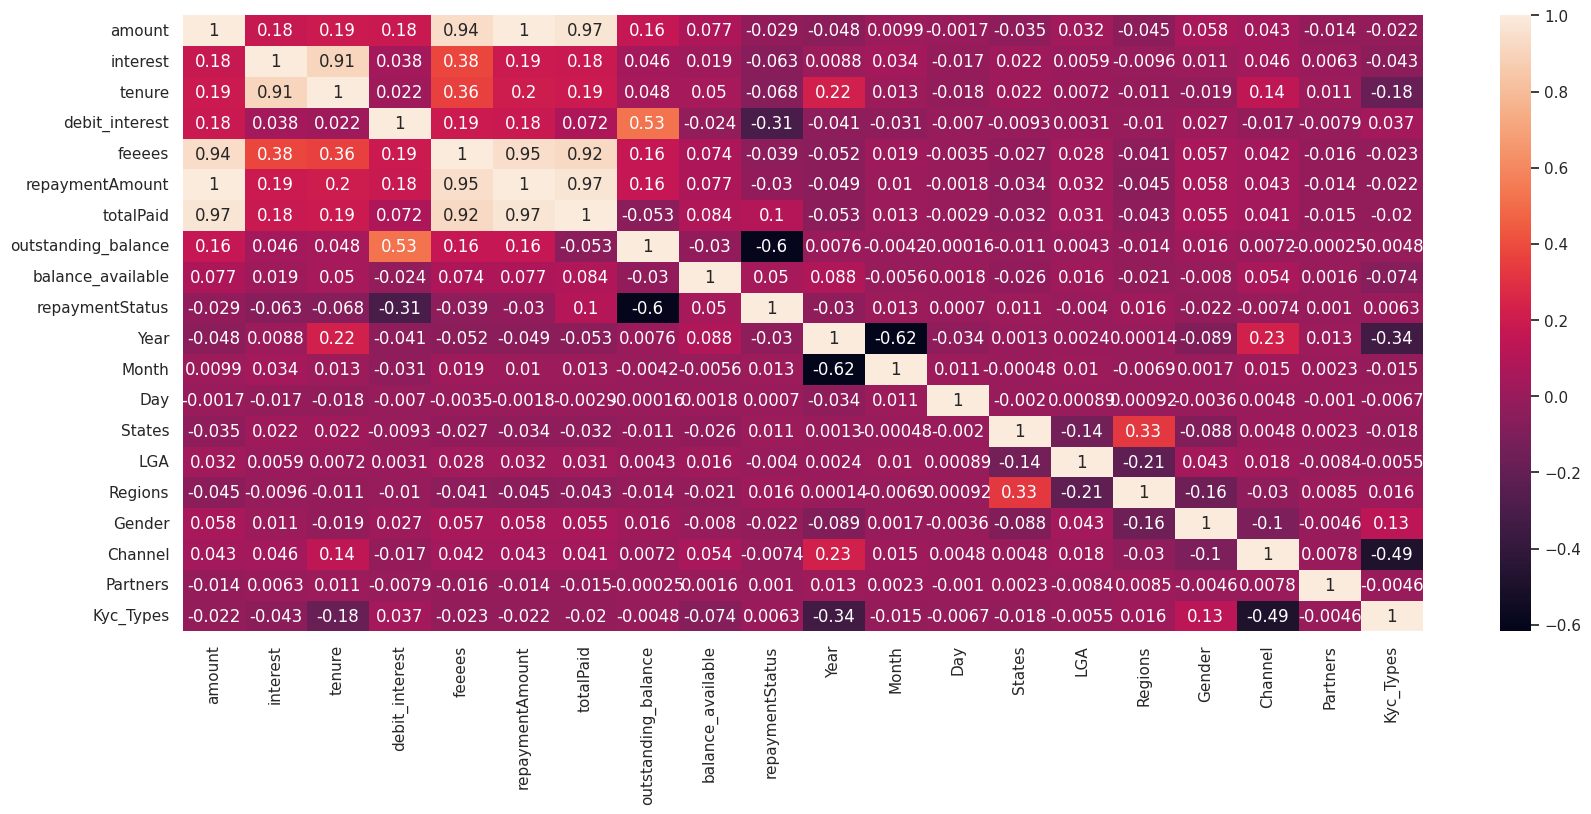

In [19]:
sns.set(rc={'figure.figsize': (20, 8)})

# Plot heatmap
sns.heatmap(Correlations, xticklabels=Correlations.columns, yticklabels=Correlations.columns, annot=True)

# Display the plot
plt.show()

##**Feature Engineering in Images Processing**##

In this session, we will be using different methods of feature extractions to form a pandas data frame and use feature engineering technic to select the best for machine learning model. It means we will be using images like subsea data images.

In [22]:
from google.colab import drive # The code reading the folder containing all the images in the zip folders on google drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
!pip install opencv-python
!pip install keras 
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import cv2 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob
import os # Inporting all the relevant libraries that will be needed to read the multiple images from the surface datasets of images provided in the coursework
import numpy as np #Loading the numpy array library to allow for basic arithmetic and data some preparation functions
from sklearn.model_selection import train_test_split #
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score ## Running the Scores Library from the SVM
import numpy as np #Importing the numpy library. Its installation mostly comes with open-cv. It can also be installed seperatly.
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from skimage.feature import corner_harris, corner_peaks
from skimage.morphology import dilation, square
import pandas as pd


In [25]:
resize_width = 100 #Resizing the width of the images to 100
resize_height = 100 #Resizing the Lenghts of the Images to 100
path = '/content/gdrive/MyDrive/Dataset/Surface/' #Reading the path
_images = [] # List to append the images as 2D numpy arrays.
_target = [] # List to append the target
O_repo = [] # Create a repo for flattened pixels
repothreshold1 = [] #Creeating the empty list for  Binarised images for feature extraction

for root, dirs, files in os.walk(path): #Looping through each images through the directories in the gdrive path.
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            try:
                img = cv2.imread(root+'/'+file, 0) #Reading the images into a variable img
                #imgshow = plt.imshow(img)
                img = cv2.resize(img, (resize_width, resize_height)) #Effecting the resized template.
                ret,threshold1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY) #This is not required at this level. It was just created if there is need for further research on this work.
                repothreshold1.append(threshold1)
                _images.append(img)
                # Append the flattened image to the pixel repo
                O_repo.append(img.flatten())
                # Append the folder where the image is to the target list
                _target.append(root.replace(path,'').replace('\\','').replace('/','')) #joining the target in the path directory to the variables and replacing slashes with nothing.
            except Exception as e:
                print("Invalid file "+file+" skipped.")
# Convert the repo list into numpy array
O_repo = np.array(O_repo)
repothreshold1 = np.array(repothreshold1)
_images = np.array(_images)
#_target = np.array(_target)
#plt.imshow(_images)
print('Threshold Datasets:', repothreshold1)
print('The classes of Surface data:', _target)
print('Shapes of the surface data:',repothreshold1.shape)
print('The size of the Surface datasets:', repothreshold1.size)
print('The shape of the surfaces', _images.shape)
#print('The size of the Target Images:', _target.size)

Invalid file rusted_airplane_53.jpg skipped.
Invalid file rusted_car_72.jpg skipped.
Invalid file rusted_objects_398.jpg skipped.
Invalid file rusted_objects_40.jpg skipped.
Threshold Datasets: [[[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0 255   0 ... 255   0   0]
  ...
  [  0   0   0 ...   0 255 255]
  [  0   0   0 ... 255 255 255]
  [  0   0   0 ...   0 255 255]]

 [[  0   0   0 ... 255 255 255]
  [  0   0   0 ... 255 255 255]
  [  0   0   0 ... 255 255 255]
  ...
  [255 255 255 ... 255 255   0]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255   0 255]]

 ...

 [[255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  ...
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]
  [255 255 255 ... 255 255 255]]



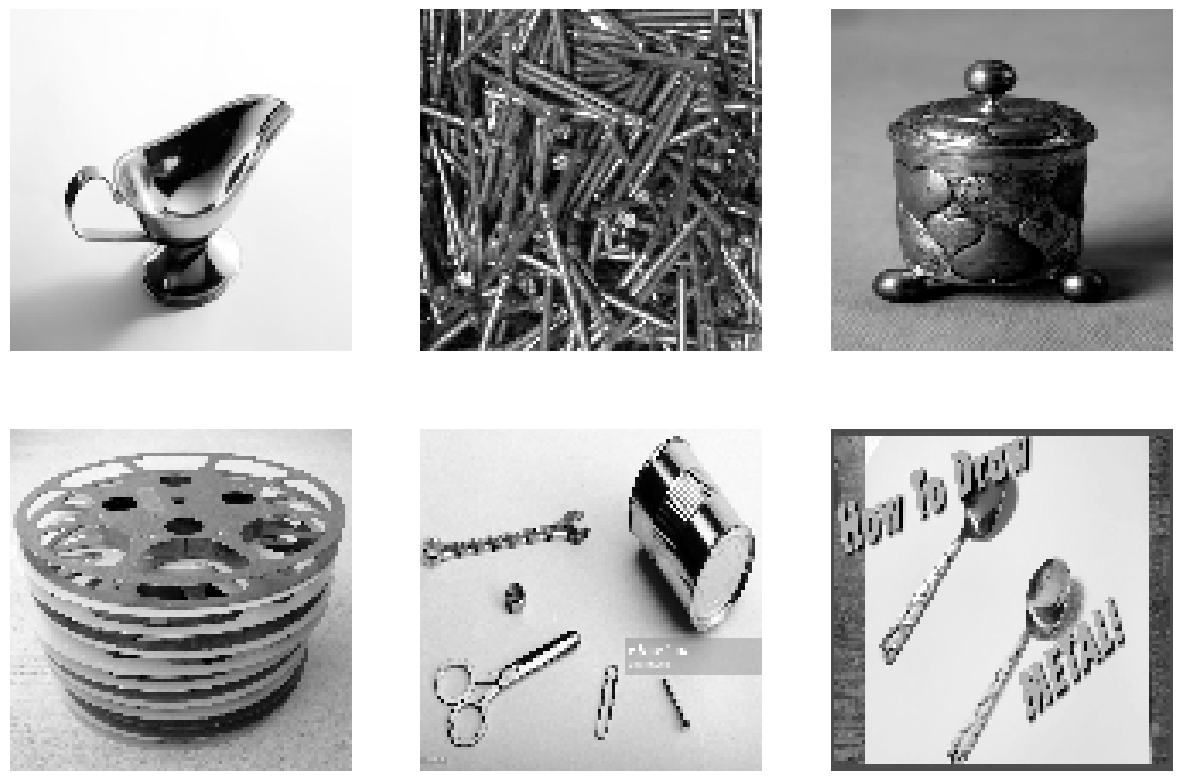

In [26]:
# Define the number of rows and columns for the subplot grid
nrows = 2 # Number of columns
ncols = 3 # Number of rows.

# Create a new figure and set its size
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 10))

# Loop through the images and plot them in the subplot grid
for i in range(nrows):
  for j in range(ncols):
    # Compute the index of the current image
    idx = i * ncols + j
    # Get the image from the repothreshold4 list
    img = _images[idx]
    #img = repothreshold1[idx]
    # Plot the image in the subplot grid
    axs[i, j].imshow(img, cmap='gray')
    axs[i, j].axis('off')

# Show the plot
plt.show()

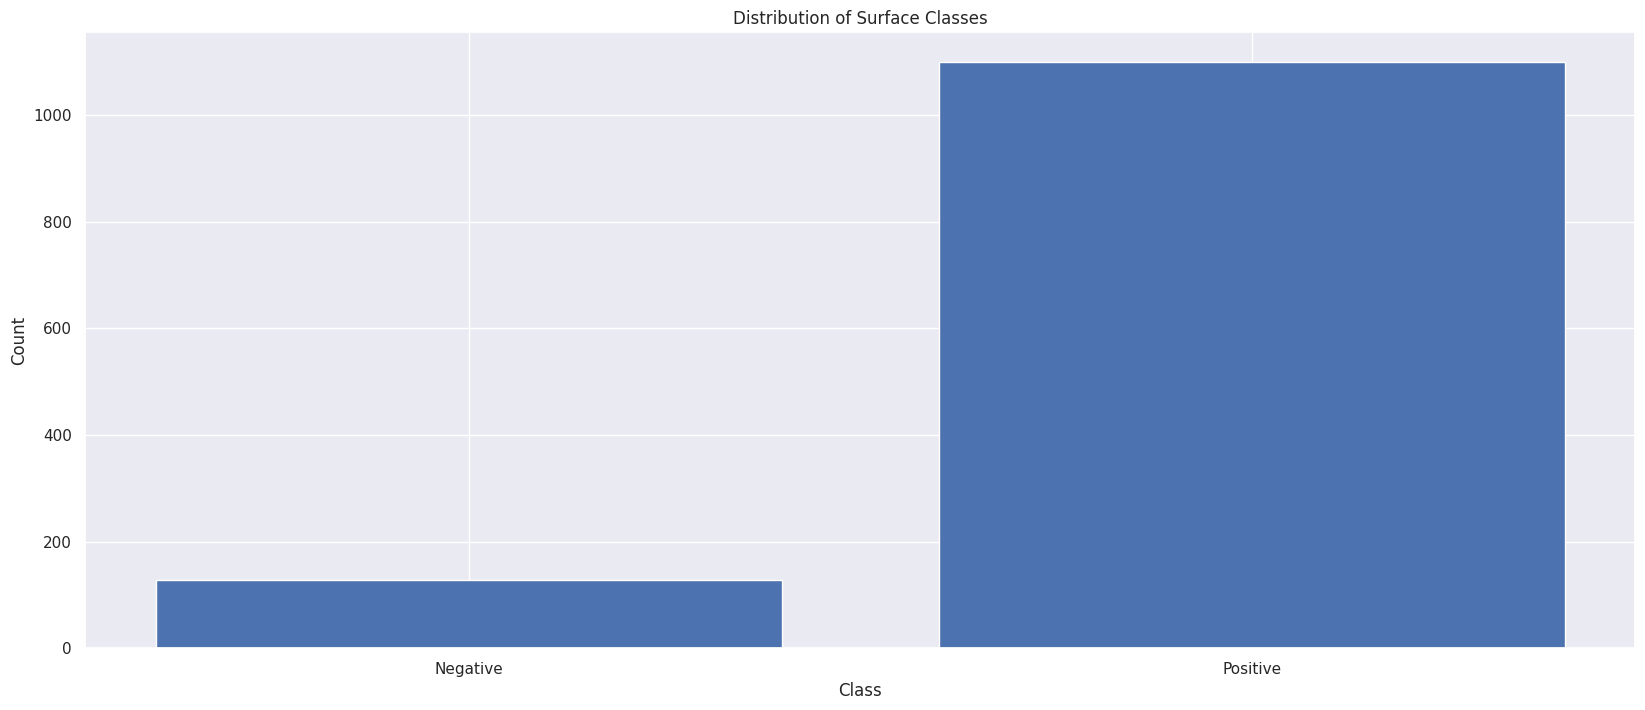

In [27]:
# Count the occurrences of each target value
target_counts = {}
for target in _target:
    if target in target_counts:
        target_counts[target] += 1
    else:
        target_counts[target] = 1

# Create a bar chart of the target counts
plt.bar(target_counts.keys(), target_counts.values())

# Add axis labels and title
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Surface Classes')

# Show the plot
plt.show()

In [28]:
target_Binarisation = [] #Create an empty list for binarised target.
target_Binarisation = [1 if i == 'Positive' else 0 for i in _target] #Ascribe number 1 to positive and 0 to negative since this is not a medical data.
target_Binarisation=np.array(target_Binarisation) #Convert the target to numpy array
print(target_Binarisation,target_Binarisation.shape) #Print the shape of the new class.

[0 0 0 ... 1 1 1] (1228,)


##Harris Corners Method##

In [29]:
harris_corners = []
for img in _images:
    # Convert the image to grayscale if necessary
    img_gray = img  # Replace this line with your grayscale conversion code if needed

    # Apply Harris corner detection
    corners = corner_peaks(corner_harris(img_gray), min_distance=5)

    # Add the corner coordinates to the list
    harris_corners.append(corners)

# Step 3: Convert the list of corner coordinates to a feature matrix
corner_features = np.array(harris_corners)

<ipython-input-29-9c24c7f7b5aa>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  corner_features = np.array(harris_corners)


In [30]:
harris_corners[0]

array([[69, 44],
       [44, 48],
       [57, 17],
       [49, 19],
       [66, 57],
       [54, 46],
       [41, 39],
       [78, 61],
       [42, 69],
       [57, 59],
       [27, 79],
       [27, 72],
       [80, 45],
       [35, 73],
       [75, 13],
       [25, 57],
       [30, 48],
       [30, 27],
       [18,  9],
       [66, 80],
       [77, 85],
       [67, 86],
       [33, 18],
       [17, 47],
       [18, 53],
       [15, 20],
       [22, 40],
       [14, 34],
       [ 8, 88],
       [ 5, 73]])

<ipython-input-31-1e4b3ee05558>:13: FutureWarning: `selem` is a deprecated argument name for `dilation`. It will be removed in version 1.0. Please use `footprint` instead.
  dilated_corners = [dilation(corners, selem=square(3)) for corners in harris_corners]


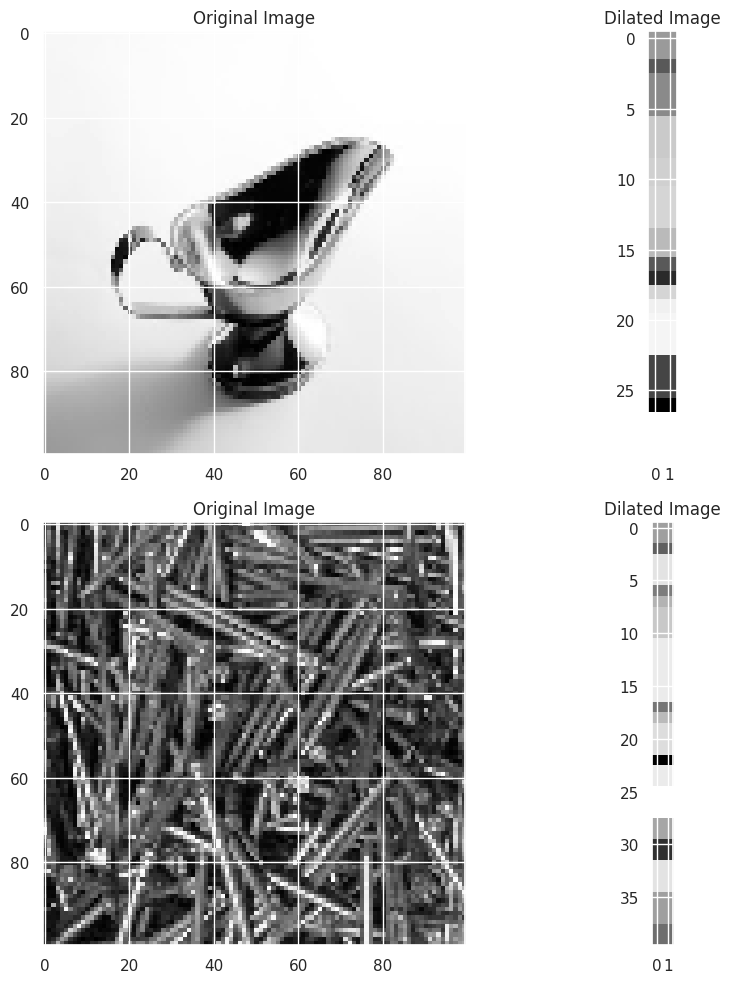

In [31]:
harris_corners = []
for img in _images:
    # Convert the image to grayscale if necessary
    img_gray = img  # Replace this line with your grayscale conversion code if needed

    # Apply Harris corner detection
    corners = corner_peaks(corner_harris(img_gray), min_distance=5)

    # Add the corner coordinates to the list
    harris_corners.append(corners)

# Step 3: Dilate the Harris corners
dilated_corners = [dilation(corners, selem=square(3)) for corners in harris_corners]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes[0, 0].imshow(_images[0], cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 1].imshow(dilated_corners[0], cmap='gray')
axes[0, 1].set_title('Dilated Image')
axes[1, 0].imshow(_images[1], cmap='gray')
axes[1, 0].set_title('Original Image')
axes[1, 1].imshow(dilated_corners[1], cmap='gray')
axes[1, 1].set_title('Dilated Image')

plt.tight_layout()
plt.show()


In [32]:
# Step 1: Flatten the list of dilated corners
flattened_corners = np.concatenate(dilated_corners).reshape(-1, 1)

# Step 2: Create a DataFrame with one column
df = pd.DataFrame(flattened_corners, columns=['Dilated Corners'])


#df['Target'] =target_values

# Step 3: Print the DataFrame
print(df)

       Dilated Corners
0                   69
1                   69
2                   69
3                   69
4                   57
...                ...
95805               90
95806               77
95807               77
95808               77
95809               77

[95810 rows x 1 columns]


In [33]:
df['Target'] = pd.DataFrame(_target, columns=['Class'])
df

,Dilated Corners,Target
0,69,Negative
1,69,Negative
2,69,Negative
3,69,Negative
4,57,Negative
...,...,...
95805,90,NaN
95806,77,NaN
95807,77,NaN
95808,77,NaN


##HOG Method##

In [34]:
def extract_hog_features(images):
    hog_features = []
    for img in _images:
        # Convert the image to grayscale if necessary
        img_gray = img  # Replace this line with your grayscale conversion code if needed

        # Extract HOG features
        features = hog(img_gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2))

        # Add the features to the list
        hog_features.append(features)

    return hog_features

# Step 1: Extract HOG features from the images
hog_features = extract_hog_features(_images)

# Step 2: Convert the list of HOG features to a feature matrix
hog_features = np.array(hog_features)
hog_features.shape

(1228, 4356)

##This is just test, the intention here is not to run a model but to do feature extraction##

In [35]:

X_train, X_test, y_train, y_test = train_test_split(hog_features, _target, test_size=0.2, random_state=42)

# Step 4: Train a classifier (SVM in this example) using the HOG features
classifier = SVC()
classifier.fit(X_train, y_train)

# Step 5: Predict the classes for the test set
predictions = classifier.predict(X_test)

# Step 6: Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9065040650406504


##Thresholding Method##

In [38]:
from skimage.filters import threshold_otsu

import numpy as np
from skimage.filters import threshold_otsu

def extract_thresholding_features(images):
    threshold_features = []
    for img in images:
        # Convert the image to grayscale if necessary
        img_gray = img  # Replace this line with your grayscale conversion code if needed

        # Apply thresholding
        threshold_value = threshold_otsu(img_gray)
        binary_image = (img_gray > threshold_value).astype(int)  # Convert boolean to integer

        # Flatten the binary image and add it to the features list
        threshold_features.append(binary_image.flatten())

    return threshold_features

# Step 1: Extract thresholding features from the images
threshold_features = extract_thresholding_features(_images)

# Step 2: Convert the list of thresholding features to a feature matrix
threshold_features = np.array(threshold_features)
print(threshold_features.shape)


(1228, 10000)
